# HDS 5210 Final Project: Osteoporosis in Multiple Data Sets
### Elisabeth C. DeMarco

This project examines data about osteoporosis in women in the United States using 2 data sources: the National Health and Nutrition Examination Survey (NHANES) and the Study of Women's Health Across the Nation (SWAN). While NHANES is continuously run, SWAN was most recently conducted between 2006-2008. Thus, the present project focuses on NHANES 2007-2008 and 2006-2008 data. 

All data/documentation can be found at the following links: 
* NHANES:
    * Demographics:
        * Documentation: https://wwwn.cdc.gov/Nchs/Nhanes/2007-2008/DEMO_E.htm
        * Data: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&CycleBeginYear=2007
            * File name: `DEMO_E.XPT`
    * Ostoporosis Questionnaire Module: 
        * Documentation: https://wwwn.cdc.gov/Nchs/Nhanes/2007-2008/OSQ_E.htm
        * Data: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&CycleBeginYear=2007
             * File name: `OSQ_E.XPT`
    * Current Health Status: 
        * Documentation: https://wwwn.cdc.gov/Nchs/Nhanes/2007-2008/HSQ_E.htm
        * Data: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&CycleBeginYear=2007
            * File name: `HSQ_E.XPT`
    * Mental Health - Depression Screener: 
        * Documentation: https://wwwn.cdc.gov/Nchs/Nhanes/2007-2008/DPQ_E.htm
        * Data: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&CycleBeginYear=2007
            * File name: `DPQ_E.XPT`

* SWAN:
    * Study of Women's Health Across the Nation (SWAN) Cross-Sectional Screener Dataset, [United States], 
        1995-1997 (ICPSR 4368): https://www.icpsr.umich.edu/web/ICPSR/studies/4368/summary
        * Codebook and data files are available for download at the same site
            * File Name: '04368-0001-Data.tsv'
    * Study of Women's Health Across the Nation (SWAN) 2006-2008: https://www.icpsr.umich.edu/web/ICPSR/studies/32961
        * Codebook and data file are available for download at the same site
            * File Name: '32961-0001-Data.tsv'

Files were saved to the `/final` directory for ease of access.  

## Study Objectives
I will be working with a medical student for her 2022 Summer Research Fellowship to examine associations between osteoporosis and mental health, with a particular focus on mental health treatment and gender disparities. We plan to use secondary data from the National Health and Nutrition Examination Survey (NHANES), a nationally representative survey comprised of in-home questionnaires and physical examinations administered at a mobile site. We will examine a subset of individuals with osteoporosis for mental health outcomes and treatment. In particular, we will use the data on osteoporosis outcomes (such as broken bones and diagnosis), general impression of mental health, and PHQ-9 scores (a commonly used screening tool for depression). Treatment data could be gathered from reports of prescription medication and mental health encounters in other modules of NHANES not included above. The larger project will include NHANES data from multiple years, using those years in which NHANES collected data on osteoporosis.

As no one dataset contains all the information one typically needs, cross-comparison between two similar data sources is often required. The current project will focus on proor-of-concept, data management, and exploratory analysis. In addition, I will compare data from NHANES with SWAN to determine whether NHANES gathers comparable information to SWAN, a longitudinal in-person study. From the current project, I will identify variables that could be harmonized and compared between the two data sources. This cross-sectional analysis will be the first step towards future comparisons between these two data sets, including later longitudinal study. This will be particularly useful as SWAN stopped collecting data in 2008, while NHANES continues to collect data. If the conclusions drawn from both studies are similar regarding women's mental health and osteoporosis outcomes, NHANES would be a good candidate data source to continue to monitor national trends in these areas. If these conclusions are different, the necessity of longitudinal studies such as SWAN would be underscored.

## Variables of Interest

The documentation for both datasets was examined and a final set of variables of interest collected. These are detailed in the `DeMarco_HDS5210Final_VariableFile.xlsx` file. Concepts of interest are summarized below:
* Age
* Sex
* Race/Ethnicity
* Education
* Osteoporosis diagnosis
* Broken bone
* Fracture of wrist or hip
* Pain interference with activities
* Feeling nervous or anxious in last month
* Felt depressed in last 2 weeks
* Overall health

## Creating the Analytic Data Set

SWAN data for 2006-2008 is limited to "Women age 51 through 63" while NHANES samples a broader portion of the US population. To facilitate accurate comparisons, NHANES data was limited to women age 51 through 63. 

Although NHANES is designed for weighted analysis, the present analysis uses unweighted counts for initial comparisons, as SWAN data does not use any weighting or oversampling. Variables that could be harmonized were identified. Common names were assigned to these variables to create a single set. The SWAN and NHANES data were then concatenated to create a composite analytic data set.

In [1]:
# Import Packages and read in data
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

# Read in tsv file from SWAN data
SWAN_2008 = pd.read_csv('32961-0001-Data.tsv', sep = '\t')
SWAN_demographics = pd.read_csv('04368-0001-Data.tsv', sep = '\t')

# Read in NHANES files
NHANES_osteoporosis = pd.read_sas('OSQ_E.XPT')
NHANES_demographics = pd.read_sas('DEMO_E.XPT')
NHANES_currenthealth = pd.read_sas('HSQ_E.XPT')
NHANES_depression = pd.read_sas('DPQ_E.XPT')

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,46,47,48,49,50,51,52,53,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,84,86,87,90,91,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,477,478,482,483,484,485,486,490,491,492,495,504,506,507,515,522,523,525,530,535,536,537,538,563,567) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Create a function to subset columns given a list of variables
def column_select (dataframe, l):
    '''dataframe, list -> dataframe
    This function takes two arguments, a dataframe and a list. It 
    returns a dataframe with only those columns matching the input
    of the list provided. 
    '''
    smalldata = dataframe[l]
    return smalldata   

In [3]:
# Pull the variables of interest from the SWAN 2008 file
SWAN_2008_Analytic = column_select(SWAN_2008, ['SWANID', 'AGE10',
                                              'OSTEOPR10', 'BROKEBO10',
                                              'BONES110',
                                              'PAINTRF10', 'NERV4WK10',
                                              'DEPRESS10', 'OVERHLT10'])

# Pull the variables of interest from the SWAN crosssectional file
SWAN_demo_Analytic = column_select(SWAN_demographics, ['SWANID', 'RACE', 'DEGREE'])

In [4]:
SWAN_2008_Analytic.head

<bound method NDFrame.head of       SWANID AGE10 OSTEOPR10 BROKEBO10 BONES110 PAINTRF10 NERV4WK10 DEPRESS10  \
0      10046    62         1         0                  1         6         1   
1      10056    61         1         0                  1         6         1   
2      10153    61         1         0                  1         6         1   
3      10196    56         1         0                  1         4         1   
4      10245    57         1         0                  1         5         2   
...      ...   ...       ...       ...      ...       ...       ...       ...   
2240   99805    52         1         0                  1         6         1   
2241   99809    53         1         0                  1         4         2   
2242   99888    58         1         0                  4         3         4   
2243   99898    55         1         0                  1         6         2   
2244   99962    57         1         0                  1         5         1  

In [5]:
# Use a left-join on SWANID to create an overall SWAN2008 analytic dataset
SWAN_full = SWAN_2008_Analytic.merge(SWAN_demo_Analytic, how = 'left', left_on = 'SWANID', right_on = 'SWANID')

SWAN_full.head

<bound method NDFrame.head of       SWANID AGE10 OSTEOPR10 BROKEBO10 BONES110 PAINTRF10 NERV4WK10 DEPRESS10  \
0      10046    62         1         0                  1         6         1   
1      10056    61         1         0                  1         6         1   
2      10153    61         1         0                  1         6         1   
3      10196    56         1         0                  1         4         1   
4      10245    57         1         0                  1         5         2   
...      ...   ...       ...       ...      ...       ...       ...       ...   
2240   99805    52         1         0                  1         6         1   
2241   99809    53         1         0                  1         4         2   
2242   99888    58         1         0                  4         3         4   
2243   99898    55         1         0                  1         6         2   
2244   99962    57         1         0                  1         5         1  

In [6]:
# Missing values in the SWAN data are denoted with '-7', '-8', '-9' and are replaced with NaN
SWAN_analytic = SWAN_full.replace(['-7', '-8', '-9', ' '], np.nan)

In [7]:
# Review that missing data has been appropriately removed
SWAN_analytic['DEPRESS10'].value_counts()

1    1452
2     442
3     144
4      52
Name: DEPRESS10, dtype: int64

In [8]:
SWAN_analytic

,SWANID,AGE10,OSTEOPR10,BROKEBO10,BONES110,PAINTRF10,NERV4WK10,DEPRESS10,OVERHLT10,RACE,DEGREE
0,10046,62,1,0,NaN,1,6,1,1,2,2
1,10056,61,1,0,NaN,1,6,1,2,4,3
2,10153,61,1,0,NaN,1,6,1,3,3,2
3,10196,56,1,0,NaN,1,4,1,3,2,5
4,10245,57,1,0,NaN,1,5,2,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...
2240,99805,52,1,0,NaN,1,6,1,3,1,4
2241,99809,53,1,0,NaN,1,4,2,1,4,4
2242,99888,58,1,0,NaN,4,3,4,5,3,3
2243,99898,55,1,0,NaN,1,6,2,3,4,5


In [9]:
# Subset the columns from the NHANES data sets
NHANES_demo_analytic = column_select(NHANES_demographics, ['SEQN', 'WTINT2YR', 
                                                          'RIDAGEYR', 'RIAGENDR',
                                                          'RIDRETH1',
                                                          'DMDEDUC2'])
NHANES_osteo_analytic = column_select(NHANES_osteoporosis, ['SEQN', 'OSQ060',
                                                           'OSQ010A', 'OSQ010B'])

NHANES_health_analytic = column_select(NHANES_currenthealth, ['SEQN', 'HSQ493', 'HSQ496', 'HSD010'])

NHANES_dep_analytic = column_select(NHANES_depression, ['SEQN', 'DPQ020'])

In [10]:
# Create a function for NHANES joins, which rely on 'SEQN'
def NHANES_join(df1, df2, method):
    '''(dataframe, dataframe, string) -> dataframe
    This function takes 2 dataframes from NHANES data and a merge method based on pd.merge and
    creates a merged dataframe. This function assumes both dataframes include the SEQN variable used
    as a unique identifier in NHANES.
    '''
    merged = df1.merge(df2, how = method, left_on = 'SEQN', right_on = 'SEQN')
    
    return merged

In [11]:
# Use the NHANES-join function to sequentially join dataframes and create the full analytic dataset
NHANES_demo_osteo = NHANES_join(NHANES_demo_analytic, NHANES_osteo_analytic, 'left')
NHANES_do_health = NHANES_join(NHANES_demo_osteo, NHANES_health_analytic, 'left')
NHANES_full = NHANES_join(NHANES_do_health, NHANES_dep_analytic, 'left')

In [12]:
# View the merged data set
NHANES_full.head

<bound method NDFrame.head of           SEQN      WTINT2YR  RIDAGEYR  RIAGENDR  RIDRETH1  DMDEDUC2  OSQ060  \
0      41475.0  59356.356426      62.0       2.0       5.0       3.0     2.0   
1      41476.0  35057.218405       6.0       2.0       5.0       NaN     NaN   
2      41477.0   9935.266183      71.0       1.0       3.0       3.0     2.0   
3      41478.0  12846.712058       1.0       2.0       3.0       NaN     NaN   
4      41479.0   8727.797555      52.0       1.0       1.0       1.0     2.0   
...        ...           ...       ...       ...       ...       ...     ...   
10144  51619.0   5197.083889      61.0       1.0       1.0       1.0     2.0   
10145  51620.0  27909.120820      50.0       2.0       3.0       2.0     2.0   
10146  51621.0  11057.659484      17.0       1.0       2.0       NaN     NaN   
10147  51622.0   9842.672903      60.0       2.0       4.0       1.0     2.0   
10148  51623.0  24692.989537      72.0       1.0       3.0       1.0     2.0   

       OS

In [13]:
# To correct the data types of HSQ493, HSQ496, and DPQ020, '77' was chosen to fill NaN
NHANES_full = NHANES_full.fillna(77)

In [14]:
# All columns except weighting changed to integer type
NHANES_analytic = NHANES_full[['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'OSQ060',
                            'OSQ010A', 'OSQ010B', 'HSQ493', 'HSQ496', 'HSD010', 'DPQ020']].astype('int64')

NHANES_analytic.head

<bound method NDFrame.head of         SEQN  RIDAGEYR  RIAGENDR  RIDRETH1  DMDEDUC2  OSQ060  OSQ010A  \
0      41475        62         2         5         3       2        2   
1      41476         6         2         5        77      77       77   
2      41477        71         1         3         3       2        2   
3      41478         1         2         3        77      77       77   
4      41479        52         1         1         1       2        2   
...      ...       ...       ...       ...       ...     ...      ...   
10144  51619        61         1         1         1       2        2   
10145  51620        50         2         3         2       2        2   
10146  51621        17         1         2        77      77       77   
10147  51622        60         2         4         1       2        2   
10148  51623        72         1         3         1       2        2   

       OSQ010B  HSQ493  HSQ496  HSD010  DPQ020  
0            2       7      10       3      

In [15]:
# Replace missing values for the NHANES data set (77, 99)
NHANES_analytic = NHANES_analytic.replace([77, 99, ' '], np.nan)

In [16]:
NHANES_analytic.dtypes

SEQN          int64
RIDAGEYR    float64
RIAGENDR      int64
RIDRETH1      int64
DMDEDUC2    float64
OSQ060      float64
OSQ010A     float64
OSQ010B     float64
HSQ493      float64
HSQ496      float64
HSD010      float64
DPQ020      float64
dtype: object

In [17]:
# To facilitate comparison betweeen SWAN and NHANES data, NHANES data limited to women age 51 - 63
ageFilter = (NHANES_analytic['RIDAGEYR'] >= 51.0) & (NHANES_analytic['RIDAGEYR'] <= 63.0)
genderFilter = NHANES_analytic['RIAGENDR'] == 2.0
finalFilter = ageFilter & genderFilter

NHANES_filtered = NHANES_analytic[finalFilter]
NHANES_filtered.dtypes

SEQN          int64
RIDAGEYR    float64
RIAGENDR      int64
RIDRETH1      int64
DMDEDUC2    float64
OSQ060      float64
OSQ010A     float64
OSQ010B     float64
HSQ493      float64
HSQ496      float64
HSD010      float64
DPQ020      float64
dtype: object

In [18]:
# Create variables in SWAN data for hip fracture and wrist fracture to harmonize with NHANES
# View the unique values
SWAN_analytic['BONES110'].value_counts()

RIGHT FOOT                        4
LEFT WRIST                        3
LEFT RIBS                         3
LEFT ELBOW                        3
LEFT PINKY TOE                    3
RIGHT ANKLE                       2
RIGHT HIP                         1
RIGHT SHOULDER                    1
RIGHT THUMB                       1
RIGHT 3RD TOE                     1
RIGHT GREAT TOE                   1
5TH METATARSEL IN RT FOOT         1
RIGHT ANKLE - DOUBLE FRACTURE     1
RIGHT ELBOW                       1
RIBS BOTH SIDES                   1
LEFT HAND NEAR WRIST              1
LEFT ULNA                         1
LT PINKY TOE, LT 5TH DIGIT        1
LEFT METATARSAL BONE              1
RIGHT FOOT ARCH BONE              1
LEFT FOOT                         1
LEFT BIG TOE                      1
BABY TOE LT FOOT 5TH DIGIT        1
BOTH FEET                         1
LEFT TOE                          1
BOTH WRISTS                       1
LEFT 2ND TOE FROM THE BIG TOE.    1
RIGHT FOURTH TOE            

In [19]:
# Create a new column for wrist fracture - attempt set aside for another time, as data type is not compatible with
# current approach and understanding
# SWAN_analytic['WristFrac'] = [1 if (bone.lower == 'both wrists') else 0 for bone in SWAN_analytic['BONES110']]

In [20]:
SWAN_analytic['BONES110']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2240    NaN
2241    NaN
2242    NaN
2243    NaN
2244    NaN
Name: BONES110, Length: 2245, dtype: object

In [21]:
SWAN_analytic['BONES110'].value_counts()

RIGHT FOOT                        4
LEFT WRIST                        3
LEFT RIBS                         3
LEFT ELBOW                        3
LEFT PINKY TOE                    3
RIGHT ANKLE                       2
RIGHT HIP                         1
RIGHT SHOULDER                    1
RIGHT THUMB                       1
RIGHT 3RD TOE                     1
RIGHT GREAT TOE                   1
5TH METATARSEL IN RT FOOT         1
RIGHT ANKLE - DOUBLE FRACTURE     1
RIGHT ELBOW                       1
RIBS BOTH SIDES                   1
LEFT HAND NEAR WRIST              1
LEFT ULNA                         1
LT PINKY TOE, LT 5TH DIGIT        1
LEFT METATARSAL BONE              1
RIGHT FOOT ARCH BONE              1
LEFT FOOT                         1
LEFT BIG TOE                      1
BABY TOE LT FOOT 5TH DIGIT        1
BOTH FEET                         1
LEFT TOE                          1
BOTH WRISTS                       1
LEFT 2ND TOE FROM THE BIG TOE.    1
RIGHT FOURTH TOE            

### Recoding Data based on Codebook

Variables were harmonized based on cross-examination of the available codebooks (detailed in `DeMarco_HDS5210Final_VariableFile.xlsx`). Variables were renamed and values recoded to facilitate comprehension based on the provided codebooks. 

In [22]:
# View the columns for SWAN data
SWAN_analytic.columns

Index(['SWANID', 'AGE10', 'OSTEOPR10', 'BROKEBO10', 'BONES110', 'PAINTRF10',
       'NERV4WK10', 'DEPRESS10', 'OVERHLT10', 'RACE', 'DEGREE'],
      dtype='object')

In [23]:
# Rename variables in SWAN data to match the common definitions
SWAN_analytic = SWAN_analytic.rename(columns = {'SWANID': 'ID', 'AGE10': 'Age', 'OSTEOPR10': 'OsteoDx', 'BROKEBO10': 'BrokeBone', 'BONES110':'FractureType', 'PAINTRF10':'Pain',
       'NERV4WK10': 'Anxiety', 'DEPRESS10': 'Depress', 'OVERHLT10': 'OverallHealth', 'RACE': 'Race', 'DEGREE': 'Educ'})

In [24]:
# Recode the overall health variable
SWAN_analytic['OverallHealth'] = SWAN_analytic['OverallHealth'].map({'1': 'Excellent',
                                    '2': 'Very Good',
                                    '3': 'Good',
                                    '4': 'Fair',
                                    '5': 'Poor',
                                    '-8': np.nan,
                                    '-7': np.nan})

In [25]:
SWAN_analytic['OverallHealth'].value_counts()

Very Good    798
Good         744
Fair         314
Excellent    294
Poor          46
Name: OverallHealth, dtype: int64

In [26]:
# Recode the Race data
SWAN_analytic.loc[SWAN_analytic['Race'] == '1', 'Race'] = 'Non-Hispanic Black'
SWAN_analytic.loc[SWAN_analytic['Race'] == '2', 'Race'] = 'Other'
SWAN_analytic.loc[SWAN_analytic['Race'] == '3', 'Race'] = 'Other'
SWAN_analytic.loc[SWAN_analytic['Race'] == '4', 'Race'] = 'Non-Hispanic White'
SWAN_analytic.loc[SWAN_analytic['Race'] == '5', 'Race'] = 'Hispanic'

In [27]:
SWAN_analytic['Race'].value_counts()

Non-Hispanic White    1114
Non-Hispanic Black     663
Other                  468
Name: Race, dtype: int64

In [28]:
# Recode Osteoporosis diagnosis variable
SWAN_analytic.loc[SWAN_analytic['OsteoDx'] == 1, 'OsteoDx'] = 'No'
SWAN_analytic.loc[SWAN_analytic['OsteoDx'] == "1", 'OsteoDx'] = 'No'
SWAN_analytic.loc[SWAN_analytic['OsteoDx'] == 2, 'OsteoDx'] = 'Yes'
SWAN_analytic.loc[SWAN_analytic['OsteoDx'] == '2', 'OsteoDx'] = 'Yes'

In [29]:
SWAN_analytic['OsteoDx'].value_counts()

No     2067
Yes     165
Name: OsteoDx, dtype: int64

In [30]:
# Recode the deppressed variable
SWAN_analytic.loc[SWAN_analytic['Depress'] == "1", 'Depress'] = 'None'
SWAN_analytic.loc[SWAN_analytic['Depress'] == '2', 'Depress'] = 'Several Days'
SWAN_analytic.loc[SWAN_analytic['Depress'] == '3', 'Depress'] = 'More than half the days'
SWAN_analytic.loc[SWAN_analytic['Depress'] == '4', 'Depress'] = 'Nearly Every Day'

In [31]:
SWAN_analytic['Depress'].value_counts()

None                       1452
Several Days                442
More than half the days     144
Nearly Every Day             52
Name: Depress, dtype: int64

In [32]:
# Recode the education variable
SWAN_analytic.loc[SWAN_analytic['Educ'] == '1', 'Educ'] = 'Less than High School'
SWAN_analytic.loc[SWAN_analytic['Educ'] == '2', 'Educ'] = 'High School Graduate'
SWAN_analytic.loc[SWAN_analytic['Educ'] == '3', 'Educ'] = 'Some College'
SWAN_analytic.loc[SWAN_analytic['Educ'] == '4', 'Educ'] = 'College Graduate and Above'
SWAN_analytic.loc[SWAN_analytic['Educ'] == '5', 'Educ'] = 'College Graduate and Above'

In [33]:
SWAN_analytic['Educ'].value_counts()

College Graduate and Above    1077
Some College                   729
High School Graduate           348
Less than High School           77
Name: Educ, dtype: int64

In [34]:
# Recode the pain variable
SWAN_analytic.loc[SWAN_analytic['Pain'] == '1', 'Pain'] = 'Not at All'
SWAN_analytic.loc[SWAN_analytic['Pain'] == '2', 'Pain'] = 'Slightly'
SWAN_analytic.loc[SWAN_analytic['Pain'] == '3', 'Pain'] = 'Moderately'
SWAN_analytic.loc[SWAN_analytic['Pain'] == '4', 'Pain'] = 'Quite a Bit'
SWAN_analytic.loc[SWAN_analytic['Pain'] == '5', 'Pain'] = 'Extremely'

In [35]:
SWAN_analytic['Pain'].value_counts()

Not at All     1185
Slightly        541
Moderately      223
Quite a Bit     115
Extremely        25
Name: Pain, dtype: int64

In [36]:
# Recode the anxiety variable
SWAN_analytic.loc[SWAN_analytic['Anxiety'] == '1', 'Anxiety'] = 'All of the Time'
SWAN_analytic.loc[SWAN_analytic['Anxiety'] == '2', 'Anxiety'] = 'Most of the Time'
SWAN_analytic.loc[SWAN_analytic['Anxiety'] == '3', 'Anxiety'] = 'A Good Bit of the Time'
SWAN_analytic.loc[SWAN_analytic['Anxiety'] == '4', 'Anxiety'] = 'Some of the Time'
SWAN_analytic.loc[SWAN_analytic['Anxiety'] == '5', 'Anxiety'] = 'A Little of the Time'
SWAN_analytic.loc[SWAN_analytic['Anxiety'] == '6', 'Anxiety'] = 'None of the Time'

In [37]:
SWAN_analytic['Anxiety'].value_counts()

None of the Time          987
A Little of the Time      724
Some of the Time          253
A Good Bit of the Time     75
Most of the Time           40
All of the Time            10
Name: Anxiety, dtype: int64

In [38]:
# Create broken bone composite variable in NHANES to harmonize with SWAN

In [39]:
# View the columns in NHANES
NHANES_filtered.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'OSQ060',
       'OSQ010A', 'OSQ010B', 'HSQ493', 'HSQ496', 'HSD010', 'DPQ020'],
      dtype='object')

In [40]:
# Rename the variables in NHANES data to match the common definitions
NHANES_filtered = NHANES_filtered.rename(columns = {'SEQN': 'ID', 'RIDAGEYR': 'Age', 'OSQ060': 'OsteoDx', 'OSQ010A': 'HipFracture', 'OSQ010B': 'WristFracture', 'HSQ493':'Pain',
       'HSQ496': 'Anxiety', 'DPQ020': 'Depress', 'HSD010': 'OverallHealth', 'RIDRETH1': 'Race', 'DMDEDUC2': 'Educ'})

In [41]:
NHANES_filtered['OverallHealth'].value_counts()

3.0    241
4.0    153
2.0    120
1.0     42
5.0     35
Name: OverallHealth, dtype: int64

In [42]:
NHANES_filtered.loc[NHANES_filtered['OverallHealth'] == 1.0, 'OverallHealth'] = 'Excellent'
NHANES_filtered.loc[NHANES_filtered['OverallHealth'] == 2.0, 'OverallHealth'] = 'Very Good'
NHANES_filtered.loc[NHANES_filtered['OverallHealth'] == 3.0, 'OverallHealth'] = 'Good'
NHANES_filtered.loc[NHANES_filtered['OverallHealth'] == 4.0, 'OverallHealth'] = 'Fair'
NHANES_filtered.loc[NHANES_filtered['OverallHealth'] == 5.0, 'OverallHealth'] = 'Poor'

In [43]:
NHANES_filtered['OverallHealth'].value_counts()

Good         241
Fair         153
Very Good    120
Excellent     42
Poor          35
Name: OverallHealth, dtype: int64

In [44]:
NHANES_filtered['Race'].value_counts()

3    254
4    161
1    123
2     92
5     29
Name: Race, dtype: int64

In [45]:
# Recode the Race data
NHANES_filtered.loc[NHANES_filtered['Race'] == 1, 'Race'] = 'Hispanic'
NHANES_filtered.loc[NHANES_filtered['Race'] == 2, 'Race'] = 'Hispanic'
NHANES_filtered.loc[NHANES_filtered['Race'] == 3, 'Race'] = 'Non-Hispanic White'
NHANES_filtered.loc[NHANES_filtered['Race'] == 4, 'Race'] = 'Non-Hispanic Black'
NHANES_filtered.loc[NHANES_filtered['Race'] == 5, 'Race'] = 'Other'

In [46]:
NHANES_filtered['Race'].value_counts()

Non-Hispanic White    254
Hispanic              215
Non-Hispanic Black    161
Other                  29
Name: Race, dtype: int64

In [47]:
NHANES_filtered.loc[NHANES_filtered['OsteoDx'] == 1, 'OsteoDx'] = 'Yes'
NHANES_filtered.loc[NHANES_filtered['OsteoDx'] == 2, 'OsteoDx'] = 'No'
NHANES_filtered.loc[NHANES_filtered['OsteoDx'] == 9, 'OsteoDx'] = np.nan

In [48]:
NHANES_filtered['OsteoDx'].value_counts()

No     568
Yes     89
Name: OsteoDx, dtype: int64

In [49]:
# Recode the deppressed variable
NHANES_filtered.loc[NHANES_filtered['Depress'] == 0, 'Depress'] = 'None'
NHANES_filtered.loc[NHANES_filtered['Depress'] == 1, 'Depress'] = 'Several Days'
NHANES_filtered.loc[NHANES_filtered['Depress'] == 2, 'Depress'] = 'More than half the days'
NHANES_filtered.loc[NHANES_filtered['Depress'] == 3, 'Depress'] = 'Nearly Every Day'
NHANES_filtered.loc[NHANES_filtered['Depress'] == 7, 'Depress'] = np.nan
NHANES_filtered.loc[NHANES_filtered['Depress'] == 9, 'Depress'] = np.nan

In [50]:
NHANES_filtered['Depress'].value_counts()

None                       402
Several Days               122
Nearly Every Day            38
More than half the days     26
Name: Depress, dtype: int64

In [51]:
# Recode the education variable
NHANES_filtered.loc[NHANES_filtered['Educ'] == 1, 'Educ'] = 'Less than High School'
NHANES_filtered.loc[NHANES_filtered['Educ'] == 2, 'Educ'] = 'Less than High School'
NHANES_filtered.loc[NHANES_filtered['Educ'] == 3, 'Educ'] = 'High School Graduate'
NHANES_filtered.loc[NHANES_filtered['Educ'] == 4, 'Educ'] = 'Some College'
NHANES_filtered.loc[NHANES_filtered['Educ'] == 5, 'Educ'] = 'College Graduate and Above'
NHANES_filtered.loc[NHANES_filtered['Educ'] == 7, 'Educ'] = np.nan
NHANES_filtered.loc[NHANES_filtered['Educ'] == 9, 'Educ'] = np.nan

In [52]:
NHANES_filtered['Educ'].value_counts()

Less than High School         199
Some College                  173
High School Graduate          161
College Graduate and Above    126
Name: Educ, dtype: int64

In [53]:
# Create a new varaible for the recoded pain data
NHANES_filtered['Pain2'] = np.nan

In [54]:
# Recode the pain variable
NHANES_filtered.loc[(NHANES_filtered['Pain'] >= 0)&(NHANES_filtered['Pain'] < 6), 'Pain2'] = 'Not at All'
NHANES_filtered.loc[(NHANES_filtered['Pain'] >= 6)&(NHANES_filtered['Pain'] < 12), 'Pain2'] = 'Slightly'
NHANES_filtered.loc[(NHANES_filtered['Pain'] >= 12)&(NHANES_filtered['Pain'] < 18), 'Pain2'] = 'Moderately'
NHANES_filtered.loc[(NHANES_filtered['Pain'] >= 18)&(NHANES_filtered['Pain'] < 24), 'Pain2'] = 'Quite a Bit'
NHANES_filtered.loc[(NHANES_filtered['Pain'] >= 24)&(NHANES_filtered['Pain'] <= 30), 'Pain2'] = 'Extremely'

In [55]:
NHANES_filtered['Pain2'].value_counts()

Not at All     464
Extremely       61
Slightly        39
Moderately      14
Quite a Bit     12
Name: Pain2, dtype: int64

In [56]:
# Create a new varaible for the recoded pain data
NHANES_filtered['Anxiety2'] = np.nan

In [57]:
# Recode the anxiety variable
NHANES_filtered.loc[(NHANES_filtered['Anxiety'] <= 30) & (NHANES_filtered['Anxiety'] >=25), 'Anxiety2'] = 'All of the Time'
NHANES_filtered.loc[(NHANES_filtered['Anxiety'] < 25) & (NHANES_filtered['Anxiety'] >=20), 'Anxiety2'] = 'Most of the Time'
NHANES_filtered.loc[(NHANES_filtered['Anxiety'] <20) & (NHANES_filtered['Anxiety'] >=15), 'Anxiety2'] = 'A Good Bit of the Time'
NHANES_filtered.loc[(NHANES_filtered['Anxiety'] < 15) & (NHANES_filtered['Anxiety'] >=10), 'Anxiety2'] = 'Some of the Time'
NHANES_filtered.loc[(NHANES_filtered['Anxiety'] <10) & (NHANES_filtered['Anxiety'] >=5), 'Anxiety2'] = 'A Little of the Time'
NHANES_filtered.loc[(NHANES_filtered['Anxiety'] < 5) & (NHANES_filtered['Anxiety'] >=0), 'Anxiety2'] = 'None of the Time'

In [58]:
NHANES_filtered['Anxiety2'].value_counts()

None of the Time          359
A Little of the Time       92
All of the Time            79
Some of the Time           29
A Good Bit of the Time     21
Most of the Time           10
Name: Anxiety2, dtype: int64

In [59]:
# Drop the raw gender, anxiety and pain columns
NHANES_filtered = NHANES_filtered.drop(columns = ['Anxiety', 'Pain', 'RIAGENDR'])
# Rename the recoded anxiety and pain columns in NHANES 
NHANES_filtered = NHANES_filtered.rename(columns = {'Anxiety2': 'Anxiety', 'Pain2': 'Pain'})

In [60]:
# Concatenate the NHANES and SWAN datasets, using the source identifier as a key and resetting the index
compositeData = pd.concat([SWAN_analytic, NHANES_filtered], axis = 0, keys = ['SWAN', 'NHANES'], names = ['source']).reset_index(level = 'source')

In [61]:
# Check the composite analytic data set
compositeData

,source,ID,Age,OsteoDx,BrokeBone,FractureType,Pain,Anxiety,Depress,OverallHealth,Race,Educ,HipFracture,WristFracture
0,SWAN,10046,62,No,0,NaN,Not at All,None of the Time,None,Excellent,Other,High School Graduate,NaN,NaN
1,SWAN,10056,61,No,0,NaN,Not at All,None of the Time,None,Very Good,Non-Hispanic White,Some College,NaN,NaN
2,SWAN,10153,61,No,0,NaN,Not at All,None of the Time,None,Good,Other,High School Graduate,NaN,NaN
3,SWAN,10196,56,No,0,NaN,Not at All,Some of the Time,None,Good,Other,College Graduate and Above,NaN,NaN
4,SWAN,10245,57,No,0,NaN,Not at All,A Little of the Time,Several Days,Very Good,Non-Hispanic White,High School Graduate,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,NHANES,51596,52,No,NaN,NaN,Not at All,A Little of the Time,None,Fair,Hispanic,Less than High School,2.0,2.0
10129,NHANES,51604,53,No,NaN,NaN,Not at All,None of the Time,None,Very Good,Non-Hispanic White,College Graduate and Above,2.0,1.0
10136,NHANES,51611,55,No,NaN,NaN,Not at All,None of the Time,None,Good,Non-Hispanic White,Some College,2.0,2.0
10140,NHANES,51615,61,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Hispanic,Less than High School,2.0,2.0


In [62]:
# Create an ordered categorical data type for specific variables
# Depression - ordered from none to nearly every day
dep_type = CategoricalDtype(categories=['None', 'Several Days', 'More than half the days', 'Nearly Every Day'], ordered=True)
health_type = CategoricalDtype(categories=['Excellent' , 'Very Good', 'Good', 'Fair', 'Poor'], ordered=True)
educ_type = CategoricalDtype(categories=['Less than High School', 'High School Graduate', 'Some College', 'College Graduate and Above'], ordered = True)
pain_type = CategoricalDtype(categories= ['Not at All', 'Slightly', 'Moderately', 'Quite a Bit', 'Extremely'], ordered = True)
anx_type = CategoricalDtype(categories = ['None of the Time', 'A Little of the Time', 'Some of the Time', 'A Good Bit of the Time', 'Most of the Time','All of the Time'], ordered = True)

In [63]:
# Convert the necessary categorical data types
compositeData['Depress'] = compositeData['Depress'].astype(dep_type)
compositeData['OverallHealth'] = compositeData['OverallHealth'].astype(health_type)
compositeData['Educ'] = compositeData['Educ'].astype(educ_type)
compositeData['Pain'] = compositeData['Pain'].astype(pain_type)
compositeData['Anxiety'] = compositeData['Anxiety'].astype(anx_type)

In [64]:
compositeData['Depress'].value_counts()

None                       1854
Several Days                564
More than half the days     170
Nearly Every Day             90
Name: Depress, dtype: int64

In [65]:
# Ensure age is numeric
compositeData['Age'] = compositeData['Age'].astype(float)

In [66]:
compositeData.dtypes

source             object
ID                  int64
Age               float64
OsteoDx            object
BrokeBone          object
FractureType       object
Pain             category
Anxiety          category
Depress          category
OverallHealth    category
Race               object
Educ             category
HipFracture       float64
WristFracture     float64
dtype: object

### Summary of Data Cleaning
The `compositeData` is limited to women between the ages of 51 and 63 (inclusive) for comparison between the two data sets. It now has a variable for the source of the data (SWAN vs. NHANES) as well as the variables identified previously. The data for broken bones could not be readily harmonized and analysis will not conducted for this project. Other variables have been recoded appropriately

## Data Analysis

This project aims to examine the chosen variables in two data sets. The mean age will be examined by source and osteoporosis diagnosis status. To examine frequency of the variables chosen, cross-tabulations will be created for the following variables:
* Osteoporosis Diagnosis
* Overall Health Status
* Depression Status
* Anxiety
* Pain interference with daily life
* Race
* Education

All cross-tabulated data is normalized by data source to facilitated comparison of the distributions. These cross-tabulations will be stored in a dictionary with the key as the variable of interest and the value as the data frame of cross-tabulated data.

In [67]:
# Examine the mean age by source (NHANES vs SWAN) and osteoporosis diagnosis
agePivot = pd.pivot_table(data = compositeData, values = 'Age', columns = ['source', 'OsteoDx'], 
                             aggfunc = np.mean)

In [68]:
agePivot

source      NHANES                  SWAN           
OsteoDx         No        Yes         No        Yes
Age      57.197183  58.539326  55.907596  56.818182

In [88]:
# Create a list of the variables of interest to explore
variablesList = ['OsteoDx', 'OverallHealth', 'Depress', 'Anxiety', 'Pain', 'Race', 'Educ']

# Create an empty dictionary for the cross-tab tables
CrossTablesDict = {}

# Create crosstab tables and append to a list of tables
for variable in variablesList:
    # Name the table after the variable called
    tableName = '{}Cross'.format(variable) 
    # Create Cross tabulations to aggregate and examine data by source for individual variables, normalizing for comparison
    table = pd.crosstab(compositeData[variable], compositeData['source'], normalize = 'columns')
    CrossTablesDict[tableName] = table

In [89]:
# Check the dictionary for proper creation
CrossTablesDict

{'OsteoDxCross': source     NHANES      SWAN
 OsteoDx                    
 No       0.864536  0.926075
 Yes      0.135464  0.073925,
 'OverallHealthCross': source           NHANES      SWAN
 OverallHealth                    
 Excellent      0.071066  0.133880
 Very Good      0.203046  0.363388
 Good           0.407783  0.338798
 Fair           0.258883  0.142987
 Poor           0.059222  0.020947,
 'DepressCross': source                     NHANES      SWAN
 Depress                                    
 None                     0.683673  0.694737
 Several Days             0.207483  0.211483
 More than half the days  0.044218  0.068900
 Nearly Every Day         0.064626  0.024880,
 'AnxietyCross': source                    NHANES      SWAN
 Anxiety                                   
 None of the Time        0.608475  0.472475
 A Little of the Time    0.155932  0.346577
 Some of the Time        0.049153  0.121111
 A Good Bit of the Time  0.035593  0.035902
 Most of the Time        0.01694

In [94]:
# Neatly print the results for examination prior to plotting
for key in CrossTablesDict:
    print(key)
    print(CrossTablesDict[key])
    print()

OsteoDxCross
source     NHANES      SWAN
OsteoDx                    
No       0.864536  0.926075
Yes      0.135464  0.073925

OverallHealthCross
source           NHANES      SWAN
OverallHealth                    
Excellent      0.071066  0.133880
Very Good      0.203046  0.363388
Good           0.407783  0.338798
Fair           0.258883  0.142987
Poor           0.059222  0.020947

DepressCross
source                     NHANES      SWAN
Depress                                    
None                     0.683673  0.694737
Several Days             0.207483  0.211483
More than half the days  0.044218  0.068900
Nearly Every Day         0.064626  0.024880

AnxietyCross
source                    NHANES      SWAN
Anxiety                                   
None of the Time        0.608475  0.472475
A Little of the Time    0.155932  0.346577
Some of the Time        0.049153  0.121111
A Good Bit of the Time  0.035593  0.035902
Most of the Time        0.016949  0.019148
All of the Time         

### Summary of Data Analysis
The SWAN participants have a younger mean age than the NHANES participants. All, however, are confined to a range of 51-63 and the mean ages are within 3 years. Thus, the ages are similar between the groups. 

Cross tabulated data was created for the variables as described above. There appears to be variation in most of the distributions, which can be better appreciated using visualization.

## Data Visualization and Discussion

The aggregated data created above will be plotted for visual comparison. 

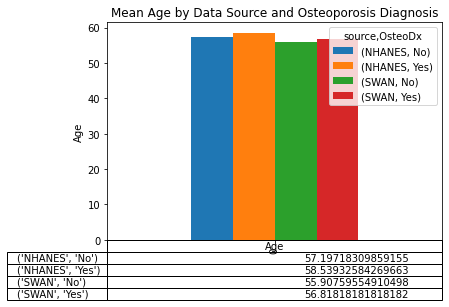

In [78]:
# Plot the mean age by source and osteoporosis diagnosis
agePivot.plot.bar(title = "Mean Age by Data Source and Osteoporosis Diagnosis",
                 table = True,
                 ylabel = 'Age',
                 use_index = False)

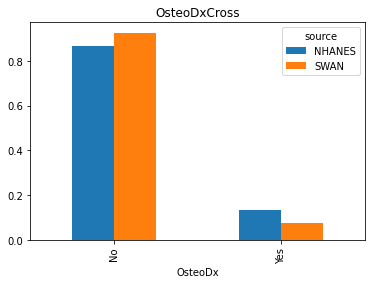

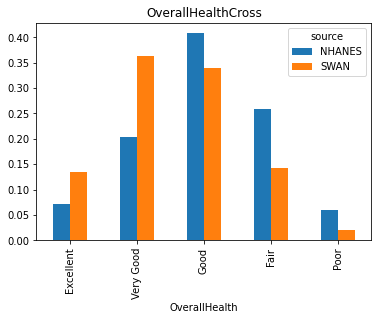

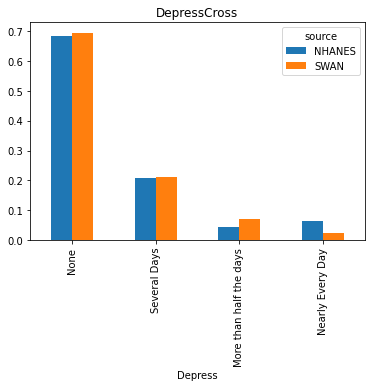

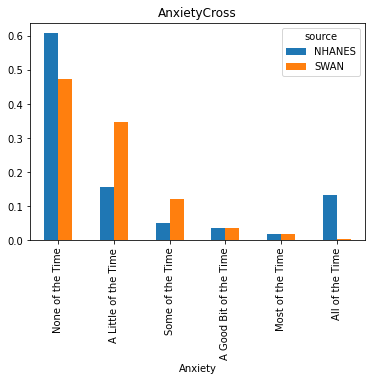

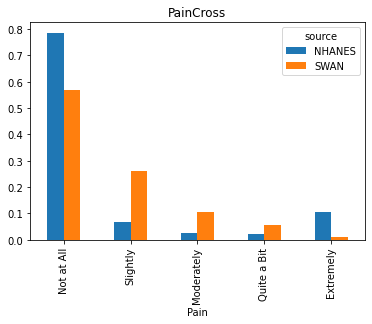

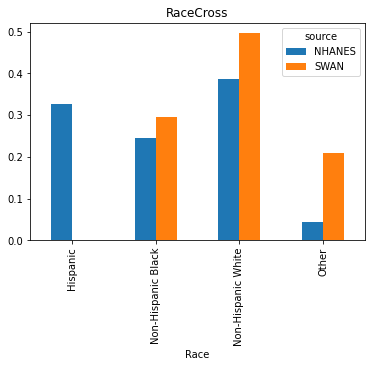

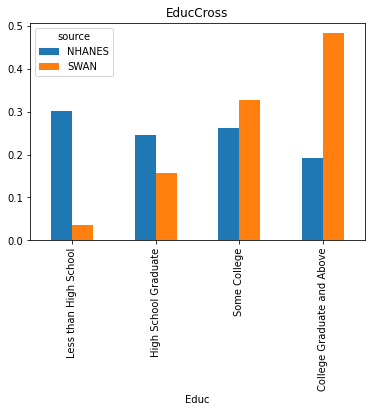

In [96]:
for key in CrossTablesDict:
    data = CrossTablesDict[key]
    data.plot.bar(title = key)

### Summary of Findings
Plots of the cross-tabulated data demonstrate variations between the SWAN and NHANES data. This is expected due to differences in sampling method and study design. Comments on each variable are provided below. 

#### Age
Mean age appears comparable between the two data sets. Examination of the standard deviation, range, and distribution would be needed to determine similarity. Regardless, all data has been constrained to ages 51-63, so the similar mean is expected.

#### Osteoporosis Diagnosis
There are more NHANES participants reporting an osteoporosis diagnosis compared to SWAN participants. This may in part be due to the wording of the question used - as SWAN participants are followed longitudinally, the participants are asked with each visit if they are newly diagnosed with osteoporosis. Thus, a more representative comparison would require merging all the available years of data for this question, as some of the participants without a new diagnosis of osteoporosis might have reported a diagnosis in previous years. 

#### Overall Health
The distribution of overall health is relatively similar. More NHANES participants tend to report worse health while more SWAN participants report better health. 

#### Depression
Days with low mood (proxy for depression) are similar among the data sources. 

#### Anxiety
SWAN participants tend to cluster in the middle for this measure, with more NHANES participants reporting all or none anxiety. This could be due to the difference in data collection - NHANES participants reported the number of days in a month when they felt anxious, which was converted to the categorical scale used by SWAN. This conversion was done by dividing the days evenly into the provided categories, which may not accurately reflect what NHANES participants would have chosen when presented with categorical options. 

#### Pain
SWAN participants tend to cluster in the middle for this measure, with more NHANES participants reporting all or none anxiety. This could be due to the difference in data collection - NHANES participants reported the number of days in a month when pain interfered with their desired activities, which was converted to the categorical scale used by SWAN. This conversion was done by dividing the days evenly into the provided categories, which may not accurately reflect what NHANES participants would have chosen when presented with categorical options. 

#### Race
NHANES is on the whole more representative and diverse than SWAN. This is in part, however, due to sampling and data recoding - SWAN reported more granular detail on Asian ethnicity compared to NHANES, which included those of Asian ethnicity in the "Other" category. This is also likely reflective of the sampling strategy and use of unweighted NHANES data. NHANES is designed to be nationally representative when weighted while SWAN sampled a selection of locations and neither claims nor attempts national distribution or representation. 

#### Education
SWAN participants were in general more highly educated than NHANES participants. This could be due to differences in sampling. 

### References
Centers for Disease Control and Prevention (CDC). National Center for Health Statistics (NCHS). National Health and Nutrition Examination Survey Data. Hyattsville, MD: U.S. Department of Health and Human Services, Centers for Disease Control and Prevention, 2007-2008, https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2007.

Sutton-Tyrrell, Kim, Selzer, Faith, Sowers, MaryFran, Finkelstein, Joel, Powell, Lynda, Gold, Ellen, … Brooks, Maria Mori. Study of Women’s Health Across the Nation (SWAN), 2006-2008: Visit 10 Dataset. Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 2018-11-15. https://doi.org/10.3886/ICPSR32961.v2

#### Github Submission
Code adapated from homework assignments.

In [80]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git pull
    !git add Final_DeMarco.ipynb
    !git commit -a -m "Submitting final project programming assignment"
    !git push
else:
    print('''
    
OK. We can wait.
''')


Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

 yes


Already up to date.
[main bb9fd44] Submitting final project programming assignment
 2 files changed, 1381 insertions(+), 318 deletions(-)
Counting objects: 6, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 98.48 KiB | 6.15 MiB/s, done.
Total 6 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:ecdmdphd/hds5210-2022.git
   157b813..bb9fd44  main -> main
